In [1]:
import cv2 as opencv
import random
from skimage.metrics import peak_signal_noise_ratio as psns
import cv2
import matplotlib.pyplot as plt
import numpy as np

(159, 240)


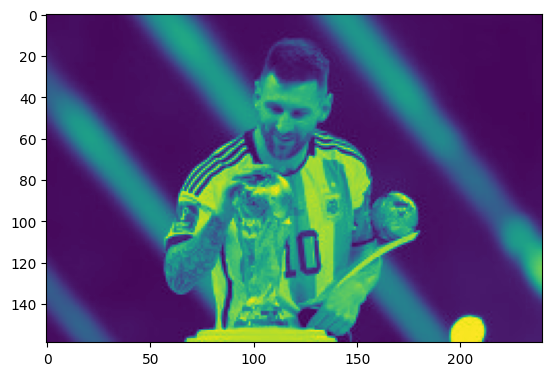

In [2]:
main_image = opencv.imread('image.jpg', cv2.IMREAD_GRAYSCALE)
image_width, image_height  = main_image.shape
print(main_image.shape)
plt.imshow(main_image)
plt.show()

In [675]:
def make_circles(image):
    
    x = np.random.randint(0,image_width-20)
    y = np.random.randint(0,image_height-20)
    radius = np.random.randint(1,min(image_width, image_height)/2)
    center = (x,y)
    outline_width = np.random.randint(1,3)
    color = (random.randint(0,255))

    cv2.circle(image, center, radius, color, thickness=outline_width)
    

In [676]:
def create_random_population(size):
    population = []
    for I in range(0, size):
        blank_image = np.zeros((image_width, image_height), dtype=np.uint8)
        make_circles(blank_image)
        population.append(blank_image)
    return population

In [677]:
def evaluate_fitness(image):   
    return psns(image, main_image)

In [678]:
def crossover(image1, image2):
    offspring = np.zeros(image1.shape,dtype=np.uint8)
    crossover_point = np.random.randint(0, image_width)
    offspring[:, :crossover_point] = image1[:, :crossover_point]
    offspring[:, crossover_point:] = image2[:, crossover_point:]
    return offspring

In [679]:
def mutate(image):
    image_filled = image.copy()
    make_circles(image_filled)
        
    return image_filled

In [680]:
def get_parents(local_population, local_fitnesses):
    local_parents_list = []
    for _ in range(0, len(local_population)):
        parents = random.choices(local_population, weights=local_fitnesses, k=2)
        local_parents_list.append(parents)
    return local_parents_list

In [681]:
population_size = 50 
chance_mutation = 0.1 

In [682]:
population = create_random_population(population_size)

In [683]:
for generation in range(0, 28000):

    fitnesses = []
    for index,img in enumerate(population):
        fitness_value = evaluate_fitness(img)
        fitnesses.append(fitness_value)

    top_population_ids = np.argsort(fitnesses)[-5:]

    new_population = []

    parents_list = get_parents(population, fitnesses)

    for i in range(0, population_size):
        first_parent = parents_list[i][0]
        second_parent = parents_list[i][1]
        new_img = crossover(first_parent, second_parent)

        if random.uniform(0.0, 1.0) < chance_mutation:
            new_img = mutate(new_img)
        new_population.append(new_img)

    for ids in top_population_ids:
        new_population.append(population[ids])

    if generation % 1000 == 0:
        print(generation)
        print('The fitness value of the best in the population : ',fitnesses[top_population_ids[0]])

    open_cv_image = np.array(population[top_population_ids[0]])

    population = new_population

    if (generation % 1000 == 0):
        cv2.imwrite(f"results/Iter{generation}.jpg", open_cv_image) 

cv2.imwrite("output.jpg", open_cv_image) 


0
The fitness value of the best in the population :  8.503798995169733
1000
The fitness value of the best in the population :  12.699868810969612
2000
The fitness value of the best in the population :  13.828461078323206
3000
The fitness value of the best in the population :  14.469905825410049
4000
The fitness value of the best in the population :  14.935453204861652
5000
The fitness value of the best in the population :  15.217381655407499
6000
The fitness value of the best in the population :  15.50011281337554
7000
The fitness value of the best in the population :  15.703114005735037
8000
The fitness value of the best in the population :  15.887279572941043
9000
The fitness value of the best in the population :  16.053819251762175
10000
The fitness value of the best in the population :  16.205577321140478
11000
The fitness value of the best in the population :  16.29976105142711
12000
The fitness value of the best in the population :  16.375095350277263
13000
The fitness value of t

True

(159, 240)


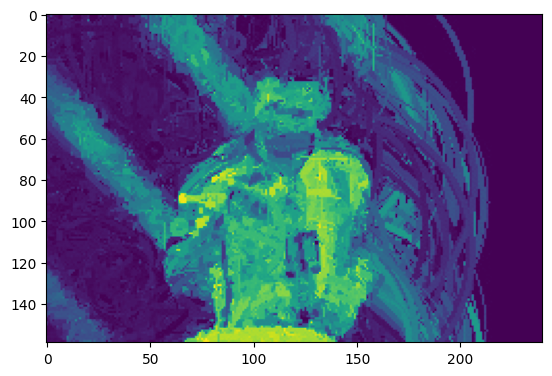

In [684]:
generated_image = opencv.imread('output.jpg', cv2.IMREAD_GRAYSCALE)
image_width, image_height  = generated_image.shape
print(generated_image.shape)
plt.imshow(generated_image)